In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('input/train.csv')
test = pd.read_csv('input/test.csv')
df_item = pd.read_csv('input/item-features.csv')
df_user = pd.read_csv('input/user-features.csv')
subm = pd.read_csv('input/sample-submission.csv')

In [20]:
from scipy.sparse import csr_matrix

interactions = csr_matrix((train['like'].map({0:-1, 1:1}).values, (train['user_id'] , train['item_id'])))
interactions = interactions.toarray()

In [51]:
from sklearn.metrics.pairwise import linear_kernel, pairwise_distances

item_sim = csr_matrix(pairwise_distances(df_item.iloc[:, 1:], metric='cosine'))
item_sim = item_sim.toarray()

In [13]:
# from pandas_profiling import ProfileReport

# profile = ProfileReport(df_item, title="Pandas Profiling Report")
# profile.to_file("df_item.html")

# profile = ProfileReport(df_user, title="Pandas Profiling Report")
# profile.to_file("df_user.html")

# profile = ProfileReport(train, title="Pandas Profiling Report")
# profile.to_file("train.html")

# profile = ProfileReport(test, title="Pandas Profiling Report")
# profile.to_file("test.html")

C:\Users\SakaevRF\AppData\Local\Continuum\anaconda3\lib\site-packages\astropy\stats\bayesian_blocks.py:432: RuntimeWarning: divide by zero encountered in log
  return N_k * (np.log(N_k) - np.log(T_k))


In [3]:
train.head()

,user_id,item_id,like,timestamp
0,140,342,0,1490936622
1,378,172,1,1490936628
2,150,182,0,1490936650
3,455,17,0,1490936704
4,350,409,0,1490936735


In [4]:
test.head()

,user_id,timestamp
0,166,1490944431
1,26,1490957371
2,41,1490958147
3,286,1490971255
4,108,1490976836


In [8]:
subm.head()

,user_id,0,1,2,3,4,5,6,7,8,...,10,11,12,13,14,15,16,17,18,19
0,166,172,47,117,192,323,251,195,359,9,...,277,242,292,87,70,88,396,314,193,39
1,26,87,174,88,337,165,25,333,72,265,...,115,243,197,335,431,338,99,177,243,285
2,41,147,147,398,423,288,265,185,127,32,...,202,244,151,163,370,183,28,290,128,128
3,286,420,53,389,38,244,273,335,388,105,...,442,31,376,257,321,425,57,291,358,119
4,108,267,430,82,91,384,398,99,53,396,...,426,84,203,324,262,47,127,131,356,180


In [9]:
df_item.head()

,item_id,0,1,2,3,4,5,6,7,8,...,22,23,24,25,26,27,28,29,30,31
0,35,0.005646,-0.012780,-0.011941,0.016942,-0.004044,0.005566,0.006587,0.005411,-0.024627,...,-0.034090,-0.005673,0.009111,-0.008770,-0.016189,-0.016189,0.003432,-0.009490,-0.009490,0.002416
1,19,0.002530,-0.005726,-0.005350,0.007591,-0.001812,0.002494,0.002951,0.002424,-0.011035,...,-0.015274,-0.002542,0.004082,-0.003929,-0.007254,-0.007254,0.001538,-0.004252,-0.004252,0.001082
2,145,0.001592,-0.003604,-0.003368,0.004778,-0.001141,0.001570,0.001858,0.001526,-0.006946,...,-0.009615,-0.001600,0.002570,-0.002473,-0.004566,-0.004566,0.000968,-0.002677,-0.002677,0.000681
3,36,0.002866,-0.006486,-0.006060,0.008598,-0.002052,0.002825,0.003343,0.002746,-0.012499,...,-0.017301,-0.002879,0.004624,-0.004451,-0.008216,-0.008216,0.001742,-0.004816,-0.004816,0.001226
4,357,0.000602,-0.001362,-0.001273,0.001806,-0.000431,0.000593,0.000702,0.000577,-0.002625,...,-0.003634,-0.000605,0.000971,-0.000935,-0.001726,-0.001726,0.000366,-0.001012,-0.001012,0.000258


In [12]:
df_user.head()

,user_id,0,1,2,3,4,5,6,7,8,...,22,23,24,25,26,27,28,29,30,31
0,0,0.000695,-0.001573,-0.001470,0.002085,-0.000498,0.000685,0.000811,0.000666,-0.003031,...,-0.004196,-0.000698,0.001121,-0.001079,-0.001993,-0.001993,0.000422,-0.001168,-0.001168,0.000297
1,1,0.001204,-0.002725,-0.002546,0.003612,-0.000862,0.001187,0.001404,0.001154,-0.005251,...,-0.007268,-0.001209,0.001942,-0.001870,-0.003451,-0.003451,0.000732,-0.002023,-0.002023,0.000515
2,2,0.000491,-0.001112,-0.001039,0.001475,-0.000352,0.000484,0.000573,0.000471,-0.002144,...,-0.002967,-0.000494,0.000793,-0.000763,-0.001409,-0.001409,0.000299,-0.000826,-0.000826,0.000210
3,3,0.000777,-0.001759,-0.001643,0.002332,-0.000557,0.000766,0.000906,0.000745,-0.003389,...,-0.004691,-0.000781,0.001254,-0.001207,-0.002228,-0.002228,0.000472,-0.001306,-0.001306,0.000332
4,4,0.000695,-0.001573,-0.001470,0.002085,-0.000498,0.000685,0.000811,0.000666,-0.003031,...,-0.004196,-0.000698,0.001121,-0.001079,-0.001993,-0.001993,0.000422,-0.001168,-0.001168,0.000297


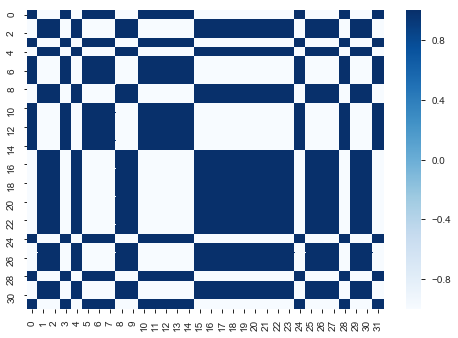

In [17]:
sns.heatmap(df_user.iloc[:, 1:].corr(), cmap='Blues')

In [5]:
train.columns

Index(['user_id', 'item_id', 'like', 'timestamp'], dtype='object')

In [8]:
train['user_id'].value_counts()

377    31
57     30
21     28
123    27
193    26
       ..
443    15
171    15
216    15
414    15
354    15
Name: user_id, Length: 497, dtype: int64

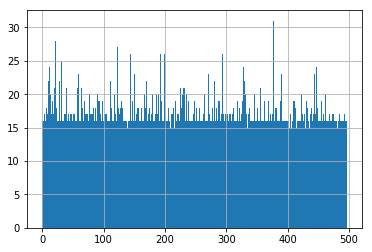

In [15]:
train['user_id'].hist(bins=500)

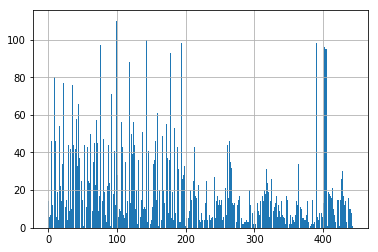

In [11]:
train['item_id'].hist(bins=500)

In [19]:
train[train['item_id']==0]

,user_id,item_id,like,timestamp
343,5,0,0,1490946983
1134,32,0,1,1490971830
1432,16,0,0,1490980845
1675,1,0,0,1490988759
1919,153,0,0,1490996337
2622,450,0,0,1491018116
3306,453,0,0,1491038711
4356,276,0,0,1491071198
5862,75,0,0,1491120869
5966,206,0,0,1491124330


In [36]:
train[train['user_id']==166].sort_values(['like', 'item_id'], ascending=[False, True])

,user_id,item_id,like,timestamp
204,166,67,1,1490942832
1111,166,115,0,1490971042
5740,166,153,0,1491116758
970,166,166,0,1490966583
6184,166,168,0,1491130842
129,166,173,0,1490940456
7866,166,177,0,1491185915
7053,166,217,0,1491158851
2199,166,253,0,1491004922
6674,166,257,0,1491146973


In [31]:
train.groupby('user_id')['like'].sum().sort_values(ascending=False)[:15]

user_id
202    23
193    21
200    20
377    19
123    19
57     17
230    17
21     16
199    15
187    15
144    14
271    14
150    14
31     14
91     13
Name: like, dtype: int64

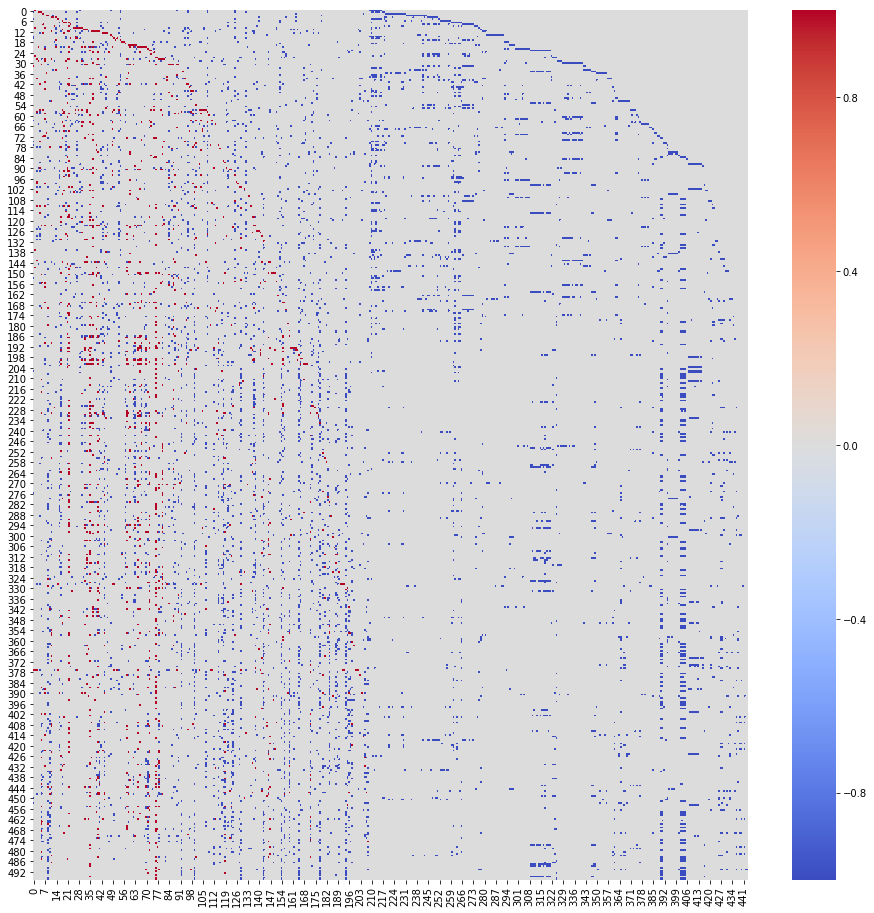

In [26]:
plt.figure(figsize=(16, 16))
sns.heatmap(interactions, cmap='coolwarm')

In [46]:
df_user.iloc[:, 1:].corr().melt()['value'].round().value_counts()

 1.0    530
-1.0    494
Name: value, dtype: int64

In [38]:
df_item.sort_values('item_id')

,item_id,0,1,2,3,4,5,6,7,8,...,22,23,24,25,26,27,28,29,30,31
388,0,0.001433,-0.003243,-0.003030,0.004299,-0.001026,0.001412,0.001671,0.001373,-0.006249,...,-0.008651,-0.001440,0.002312,-0.002225,-0.004108,-0.004108,0.000871,-0.002408,-0.002408,0.000613
169,1,0.002482,-0.005617,-0.005248,0.007446,-0.001777,0.002446,0.002895,0.002378,-0.010824,...,-0.014983,-0.002493,0.004004,-0.003855,-0.007115,-0.007115,0.001508,-0.004171,-0.004171,0.001062
239,2,0.001871,-0.004236,-0.003958,0.005615,-0.001340,0.001845,0.002183,0.001793,-0.008162,...,-0.011299,-0.001880,0.003020,-0.002907,-0.005365,-0.005365,0.001137,-0.003145,-0.003145,0.000801
425,3,0.001390,-0.003146,-0.002940,0.004171,-0.000996,0.001370,0.001622,0.001332,-0.006063,...,-0.008392,-0.001397,0.002243,-0.002159,-0.003985,-0.003985,0.000845,-0.002336,-0.002336,0.000595
260,4,0.001738,-0.003933,-0.003675,0.005213,-0.001244,0.001713,0.002027,0.001665,-0.007579,...,-0.010490,-0.001746,0.002804,-0.002699,-0.004982,-0.004982,0.001056,-0.002920,-0.002920,0.000743
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167,439,0.000348,-0.000787,-0.000735,0.001043,-0.000249,0.000343,0.000405,0.000333,-0.001516,...,-0.002098,-0.000349,0.000561,-0.000540,-0.000996,-0.000996,0.000211,-0.000584,-0.000584,0.000149
346,440,0.000777,-0.001759,-0.001643,0.002332,-0.000557,0.000766,0.000906,0.000745,-0.003389,...,-0.004691,-0.000781,0.001254,-0.001207,-0.002228,-0.002228,0.000472,-0.001306,-0.001306,0.000332
37,441,-0.121692,0.181685,0.204412,-0.150535,0.235095,-0.389399,-0.326175,0.287157,-0.107230,...,-0.035643,-0.015009,-0.286772,0.002378,-0.065991,-0.065991,-0.112601,0.159891,0.159891,-0.370836
178,442,0.000491,-0.001112,-0.001039,0.001475,-0.000352,0.000484,0.000573,0.000471,-0.002144,...,-0.002967,-0.000494,0.000793,-0.000763,-0.001409,-0.001409,0.000299,-0.000826,-0.000826,0.000210


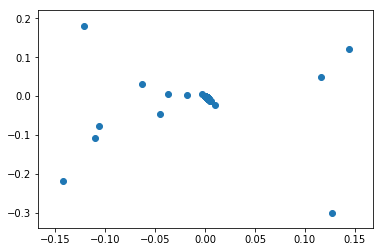

In [49]:
plt.scatter(df_item.iloc[:, 1], df_item.iloc[:, 2])

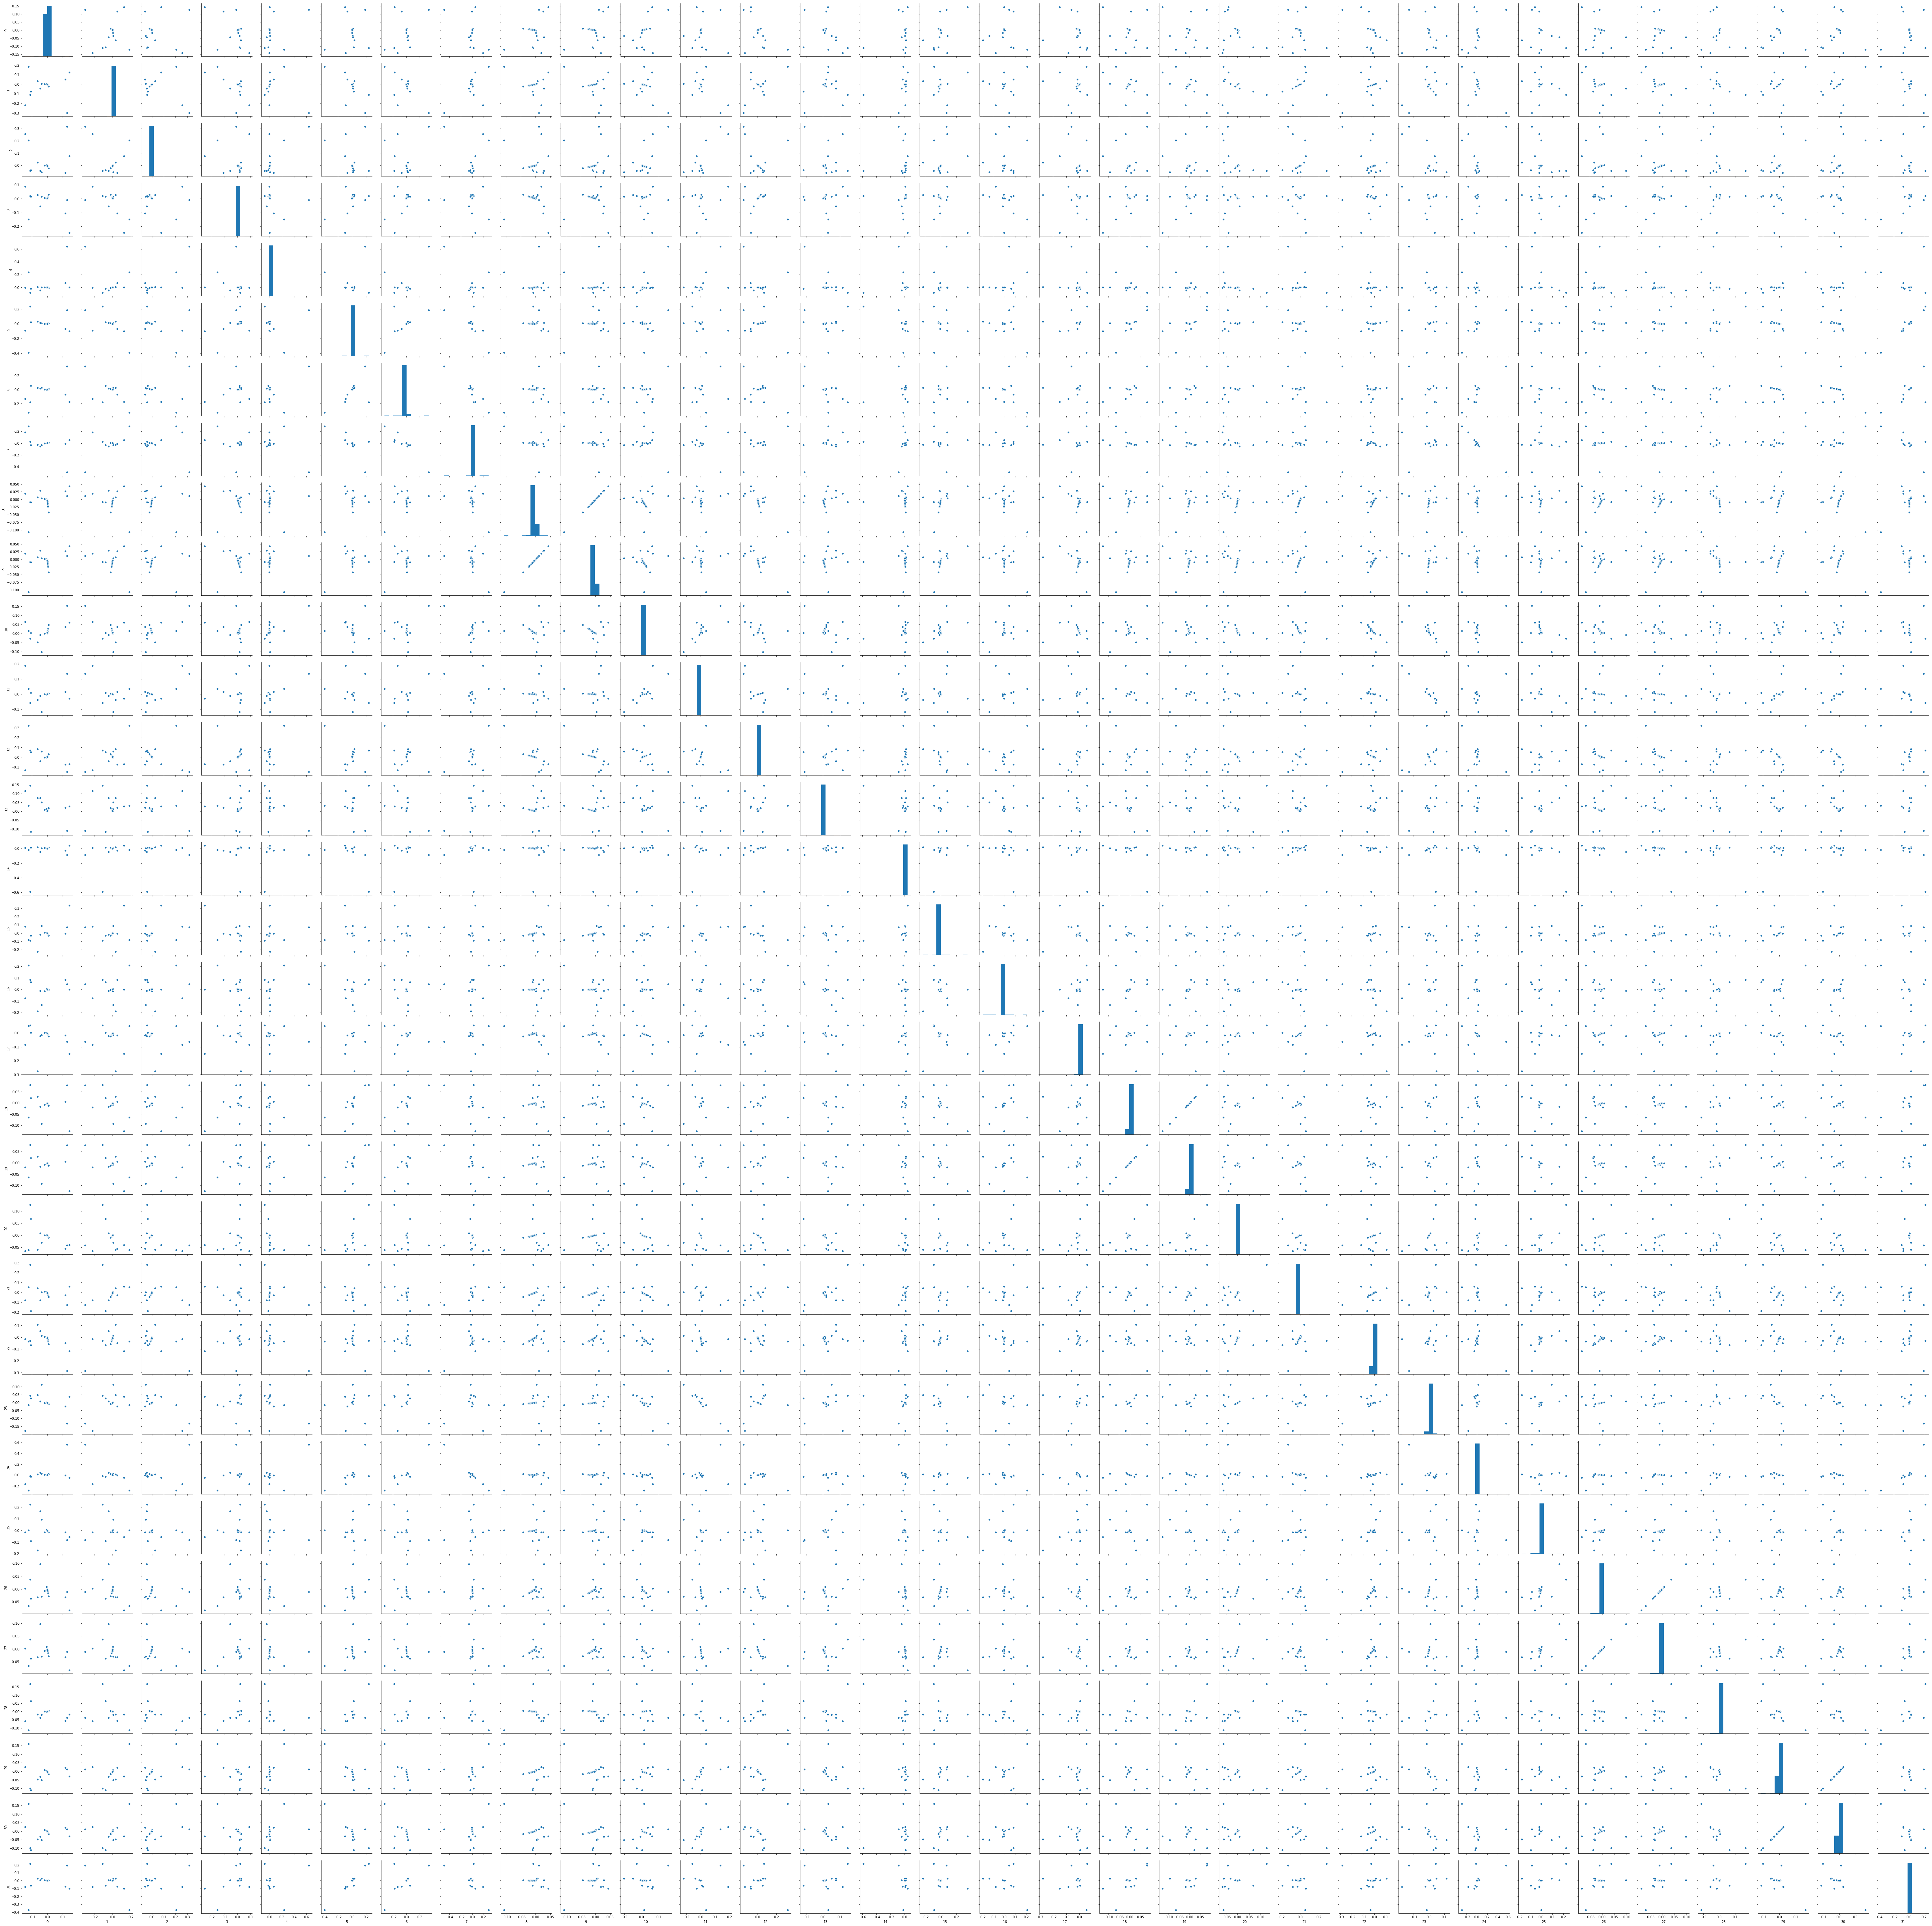

In [50]:
sns.pairplot(df_item.iloc[:, 1:])

In [93]:
first = 25

pair = (first, item_sim[first].argmax())
sample = train[train['item_id'].isin(pair)].sort_values('item_id')
sample[sample.duplicated('user_id', keep=False)]

,user_id,item_id,like,timestamp
3020,104,23,0,1491030386
3913,104,25,1,1491057725


#### похожие по метрике юзеры

In [193]:
first = 10  #37

pair = (first, (df_user['0'] - df_user.loc[first, '0']).abs().sort_values().index[1])
print(pair)
sample = train[train['item_id'].isin(pair)].sort_values('item_id')
res = sample[sample.duplicated('user_id', keep=False)].sort_values(['item_id', 'user_id'])
res

(10, 368)


,user_id,item_id,like,timestamp
5365,52,10,0,1491104078
2030,481,10,0,1490999617
6534,52,368,0,1491142129
4129,481,368,0,1491064477


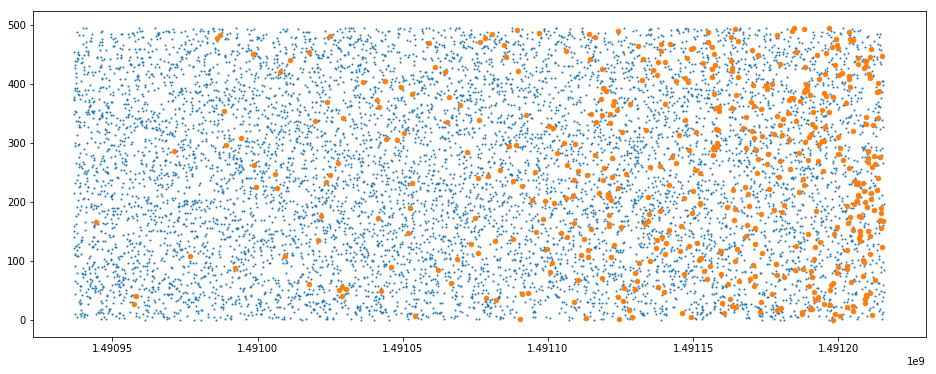

In [204]:
plt.figure(figsize=(16, 6))
plt.scatter(train.timestamp, train.user_id, s=1)
plt.scatter(test.timestamp, test.user_id, s=20)

In [372]:
train.groupby('user_id').count().sort_values('like', ascending=False).head()

,item_id,like,timestamp
user_id,,,
377,31,31,31
57,30,30,30
21,28,28,28
123,27,27,27
230,26,26,26


In [385]:
like_count.reset_index().merge(df_user.iloc[:, :2], on='user_id')

,user_id,like,0
0,377,31,0.002844
1,57,30,0.001871
2,21,28,0.002802
3,123,27,0.006216
4,230,26,0.004053
...,...,...,...
492,225,15,0.002647
493,209,15,0.000491
494,440,15,0.004038
495,139,15,0.000851


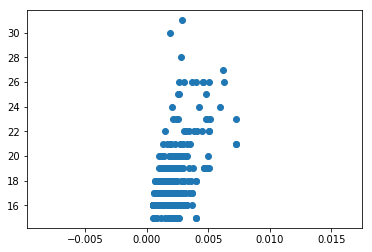

In [391]:
# количество рекомендаций

like_count = train.groupby('user_id').count().sort_values('like', ascending=False)['like']
like_count = like_count.reset_index().merge(df_user.iloc[:, :2], on='user_id')

like_count = like_count.sort_values('0')
plt.scatter(like_count['0'], like_count['like'])

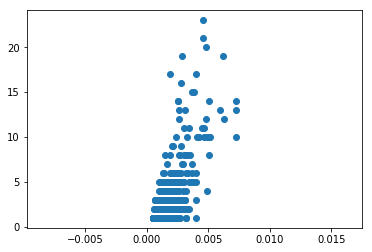

In [403]:
# количество лайков

like_count = train.groupby('user_id')['like'].sum().sort_values()
like_count = like_count.reset_index().merge(df_user.iloc[:, :2], on='user_id')

like_count = like_count.sort_values('0')
plt.scatter(like_count['0'], like_count['like'])

***Количество юзеров с количеством лайков больше 5***

In [418]:
a = like_count['like'].value_counts().sort_index()
a[a.index >= 5].sum() / a.sum()

0.19517102615694165

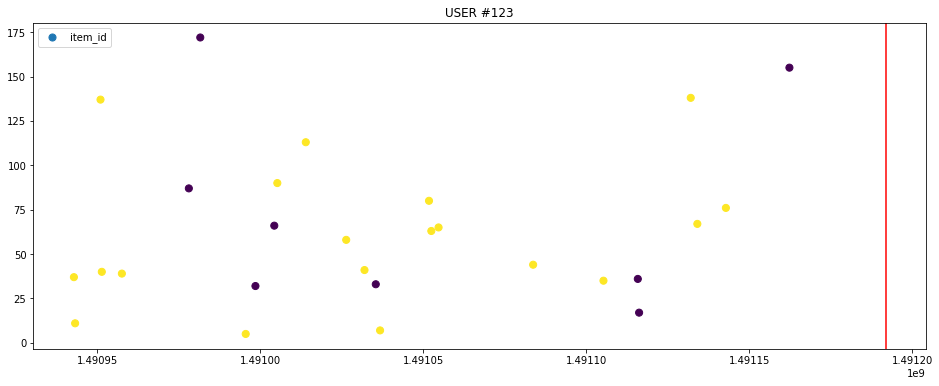

In [277]:
uid = 123

plt.figure(figsize=(16, 6))
plt.scatter(train[train['user_id']==uid].timestamp, train[train['user_id']==uid].item_id, s=50, 
            c=train[train['user_id']==uid].like)
plt.axvline(test[test['user_id']==uid].timestamp.values[0], color='red')

plt.title(f'USER #{uid}');
plt.legend()

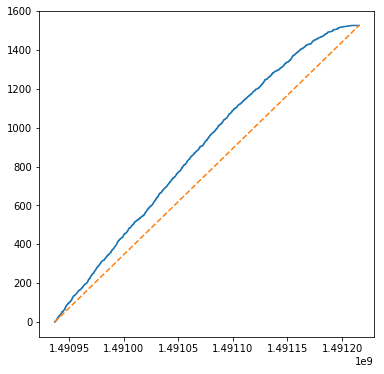

In [283]:
uid = 377

like_sum = train.like.cumsum()

plt.figure(figsize=(6, 6))
plt.plot(train.timestamp, like_sum)
plt.plot([train.timestamp.min(), train.timestamp.max()], [like_sum.min(), like_sum.max()], ls='--')

[ 0.524498   14.42004787 -0.33037808]


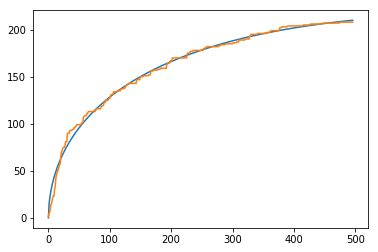

In [369]:
from scipy import optimize

def test_func(x, n, b, c):
    return np.power(x, n) * b + c * x

max_id = train[train['like'] == 1].groupby('user_id')['item_id'].max().rolling(40, min_periods=1).max()

params, params_covariance = optimize.curve_fit(test_func, max_id.index, max_id.values, p0=[0.5, 15, 0])
print(params)

user_ids = np.array(range(len(max_id)))
ynew = test_func(user_ids, params[0], params[1], params[2])

plt.plot(user_ids, ynew)
plt.plot(max_id.index, max_id.values)

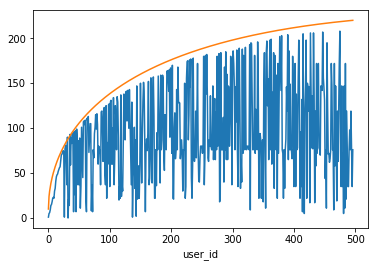

In [371]:
train[train['like'] == 1].groupby('user_id')['item_id'].max().plot()
plt.plot(ynew + 10)

In [395]:
train[train['like'] == 1].sort_values('user_id')

,user_id,item_id,like,timestamp
3347,0,1,1,1491039949
5627,1,3,1,1491112954
4109,1,4,1,1491064028
5607,1,5,1,1491112270
2877,2,6,1,1491025813
...,...,...,...,...
1549,493,71,1,1490984611
3377,493,119,1,1491040772
1640,494,76,1,1490987655
3958,495,35,1,1491059108
